In [1]:
# Slide 3: Importing Required Libraries
#1 Import necessary libraries for data processing, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import TruncatedSVD, PCA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Imports libraries for Linear Regression, SVD, PCA, and visualization
# Sets up inline plotting for Jupyter Notebook


In [ ]:
# Slide 4: Loading the Dataset
#1 Load the dataset from CSV file
df = pd.read_csv("content.csv")

# Reads the CSV file into a pandas DataFrame
# Assumes the file is in the same directory as the notebook

In [3]:
# Slide 5: Displaying Dataset
#1 Display the dataset after loading
print("Dataset Preview:")
print(df)

# Prints the dataset for verification
# Shows first and last few rows

Dataset Preview:
            content_id content_type language    genre  duration release_date  \
0       cont_475_19_32       series  english    drama   4980000   2018-07-01   
1      cont_2185_15_21       series  english    drama   3000000   2016-03-29   
2      cont_4857_13_28       series    tamil   comedy   3120000   2006-03-06   
3        cont_3340_1_5       sports    hindi  cricket   9900000   2009-01-10   
4      cont_1664_10_29       series    hindi   action   3660000   2020-05-25   
...                ...          ...      ...      ...       ...          ...   
48640   cont_4218_6_15       series    hindi    drama   3360000   2015-02-04   
48641   cont_2533_1_14       series  marathi   sci-fi   3120000   2002-01-15   
48642   cont_4606_33_5       series    hindi    drama   3180000   2006-02-18   
48643    cont_3708_9_1       series  english    drama   4020000   2010-04-12   
48644    cont_3470_2_4       series  english   horror   2760000   1997-03-26   

       rating  episode

In [4]:
# Slide 7: Display First Few Records
#1 Show the first 5 rows of the dataset
print("First 5 Rows:")
print(df.head())

# Displays the first 5 rows using head()
# Helps understand the dataset structure

First 5 Rows:
        content_id content_type language    genre  duration release_date  \
0   cont_475_19_32       series  english    drama   4980000   2018-07-01   
1  cont_2185_15_21       series  english    drama   3000000   2016-03-29   
2  cont_4857_13_28       series    tamil   comedy   3120000   2006-03-06   
3    cont_3340_1_5       sports    hindi  cricket   9900000   2009-01-10   
4  cont_1664_10_29       series    hindi   action   3660000   2020-05-25   

   rating  episode_count  season_count  
0      10             32            19  
1       4             21            15  
2       8             28            13  
3       0              5             1  
4       2             29            10  


In [5]:
# Slide 8: Checking Dataset Volume
#1 Check the number of rows and columns
print("Dataset Shape (Rows, Columns):", df.shape)

# Returns dataset size (e.g., 48000, 9)
# Confirms data volume

Dataset Shape (Rows, Columns): (48645, 9)


In [6]:
# Slide 9: Data Types & Structure
#1 Display data types of each column
print("Data Types:")
print(df.dtypes)

# Shows data types (e.g., object, int64)
# Identifies columns for conversion

Data Types:
content_id       object
content_type     object
language         object
genre            object
duration          int64
release_date     object
rating            int64
episode_count     int64
season_count      int64
dtype: object


In [7]:
# Slide 10: Statistical Summary
#1 Generate summary statistics
print("Statistical Summary:")
print(df.describe())

# Provides stats like mean, std, min, max
# Summarizes numerical data

Statistical Summary:
           duration        rating  episode_count  season_count
count  4.864500e+04  48645.000000   48645.000000  48645.000000
mean   3.526825e+06      5.042163      16.216631      6.613033
std    9.114208e+05      3.092649      12.752946      6.151200
min    6.000000e+04      0.000000       0.000000      0.000000
25%    3.000000e+06      2.000000       6.000000      2.000000
50%    3.300000e+06      5.000000      13.000000      5.000000
75%    3.780000e+06      8.000000      24.000000      9.000000
max    1.110000e+07     10.000000      60.000000     44.000000


In [8]:
# Slide 11: Display Column Names
#1 Print all column names
print("Column Names:")
print(df.columns.tolist())

# Lists column names for reference
# Useful for later steps

Column Names:
['content_id', 'content_type', 'language', 'genre', 'duration', 'release_date', 'rating', 'episode_count', 'season_count']


In [9]:
# Slide 12: Checking Missing Values
#1 Identify null values
print("Missing Values:")
print(df.isnull().sum())

# Counts missing values per column
# Indicates cleaning needs

Missing Values:


content_id       0
content_type     0
language         0
genre            0
duration         0
release_date     0
rating           0
episode_count    0
season_count     0
dtype: int64


In [10]:
# Slide 13: Checking Duplicate Values
#1 Find duplicate rows
print("Duplicate Rows:", df.duplicated().sum())

# Counts duplicate rows
# Assesses data quality

Duplicate Rows: 0


In [11]:
# Slide 14: Removing Duplicate Rows
#1 Remove duplicates if they exist
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

# Drops duplicates and updates DataFrame
# Verifies new size

Shape after removing duplicates: (48645, 9)


In [12]:
# Slide 15: Identifying Missing Values (Detailed)
#1 Use info() for a detailed overview
print("Dataset Info:")
print(df.info())

# Shows non-null counts and data types
# Complements null check

Dataset Info:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48645 entries, 0 to 48644
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content_id     48645 non-null  object
 1   content_type   48645 non-null  object
 2   language       48645 non-null  object
 3   genre          48645 non-null  object
 4   duration       48645 non-null  int64 
 5   release_date   48645 non-null  object
 6   rating         48645 non-null  int64 
 7   episode_count  48645 non-null  int64 
 8   season_count   48645 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.3+ MB
None


In [13]:
# Slide 16: Filling Missing Values
#1 Fill missing values with appropriate strategies
df['rating'] = df['rating'].fillna(df['rating'].mean())  # Numeric
df['genre'] = df['genre'].fillna(df['genre'].mode()[0])  # Categorical
print("Missing Values After Filling:")
print(df.isnull().sum())

# Fills NaN with mean for numeric, mode for categorical
# Ensures no missing values

Missing Values After Filling:
content_id       0
content_type     0
language         0
genre            0
duration         0
release_date     0
rating           0
episode_count    0
season_count     0
dtype: int64


In [14]:
# Slide 17: Detecting Outliers (Using IQR for 'duration')
#1 Calculate IQR and detect outliers
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['duration'] < (Q1 - 1.5 * IQR)) | (df['duration'] > (Q3 + 1.5 * IQR))]
print("Number of Outliers in Duration:", len(outliers))

# Uses IQR to detect outliers in 'duration'
# Prints outlier count

Number of Outliers in Duration: 3606


In [15]:
# Slide 18: Removing Outliers
#1 Remove outliers from 'duration'
df = df[~((df['duration'] < (Q1 - 1.5 * IQR)) | (df['duration'] > (Q3 + 1.5 * IQR)))]
print("Shape after removing outliers:", df.shape)

# Filters out outliers
# Updates DataFrame

Shape after removing outliers: (45039, 9)


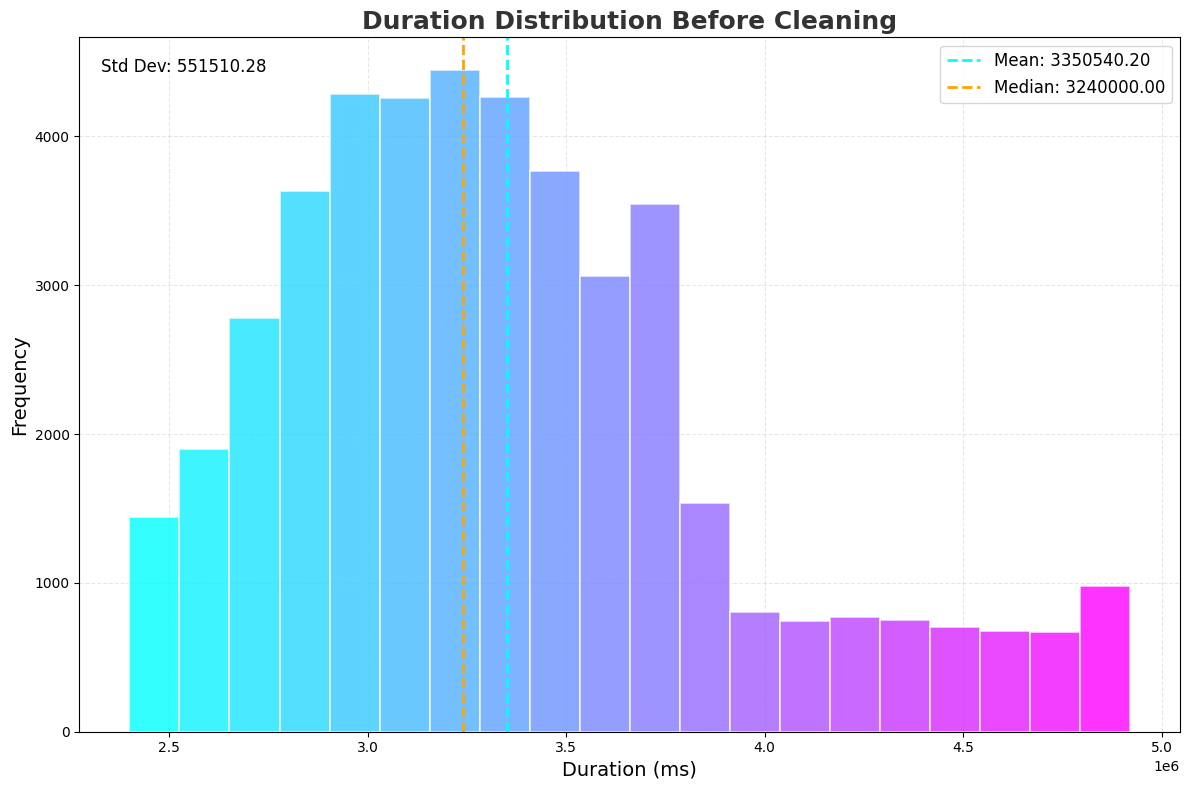

In [16]:
# Slide 19: Data Distribution Before Cleaning (Histogram)
plt.figure(figsize=(12, 8))
# Calculate statistics
mean_val = df['duration'].mean()
median_val = df['duration'].median()
std_val = df['duration'].std()

# Create histogram with gradient colors
n, bins, patches = plt.hist(df['duration'], bins=20, alpha=0.8, edgecolor='white', linewidth=1.2)

# Create color gradient (blue shades)
cm = plt.cm.get_cmap('cool')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col = col / max(col)

# Apply gradient to histogram bars
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
# Add grid and style
plt.grid(True, alpha=0.3, linestyle='--')
plt.gca().set_axisbelow(True)

# Add title and labels
plt.title('Duration Distribution Before Cleaning', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Duration (ms)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add statistical lines and annotations
plt.axvline(x=mean_val, color='#00FFFF', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(x=median_val, color='#FFA500', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
plt.text(0.02, 0.95, f'Std Dev: {std_val:.2f}', transform=plt.gca().transAxes, fontsize=12)

# Add legend and layout
plt.legend(frameon=True, fontsize=12)
plt.tight_layout()
plt.show()
# Plots histogram of 'duration' before cleaning with gradient colors and statistics


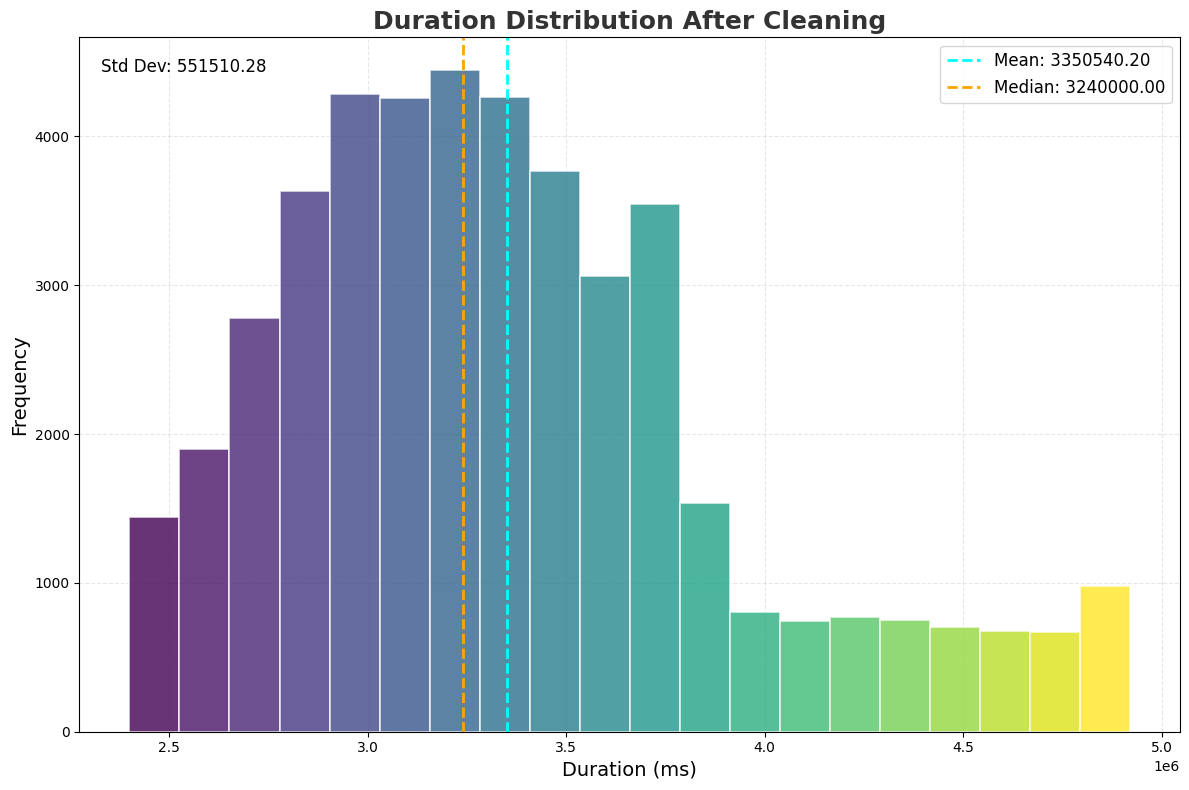

In [17]:
# Slide 20: Data Distribution After Cleaning
plt.figure(figsize=(12, 8))
# Calculate statistics after cleaning
mean_val = df['duration'].mean()  # Using cleaned df
median_val = df['duration'].median()
std_val = df['duration'].std()

# Create histogram with gradient colors
n, bins, patches = plt.hist(df['duration'], bins=20, alpha=0.8, edgecolor='white', linewidth=1.2)

# Create color gradient (green-blue shades)
cm = plt.cm.get_cmap('viridis')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col = col / max(col)

# Apply gradient to histogram bars
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
# Add grid and style
plt.grid(True, alpha=0.3, linestyle='--')
plt.gca().set_axisbelow(True)

# Add title and labels
plt.title('Duration Distribution After Cleaning', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Duration (ms)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add statistical lines and annotations
plt.axvline(x=mean_val, color='#00FFFF', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(x=median_val, color='#FFA500', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
plt.text(0.02, 0.95, f'Std Dev: {std_val:.2f}', transform=plt.gca().transAxes, fontsize=12)

# Add legend and layout
plt.legend(frameon=True, fontsize=12)
plt.tight_layout()
plt.show()
# Plots histogram of 'duration' after cleaning with enhanced visuals


In [18]:
# Slide 21: Skewness Analysis
#1 Analyze skewness of numerical columns
print("Skewness:")
print(df[['duration', 'rating', 'episode_count', 'season_count']].skew())

# Calculates skewness for numerical columns
# Indicates data asymmetry

Skewness:
duration         0.843624
rating           0.003551
episode_count    0.927183
season_count     1.881048
dtype: float64


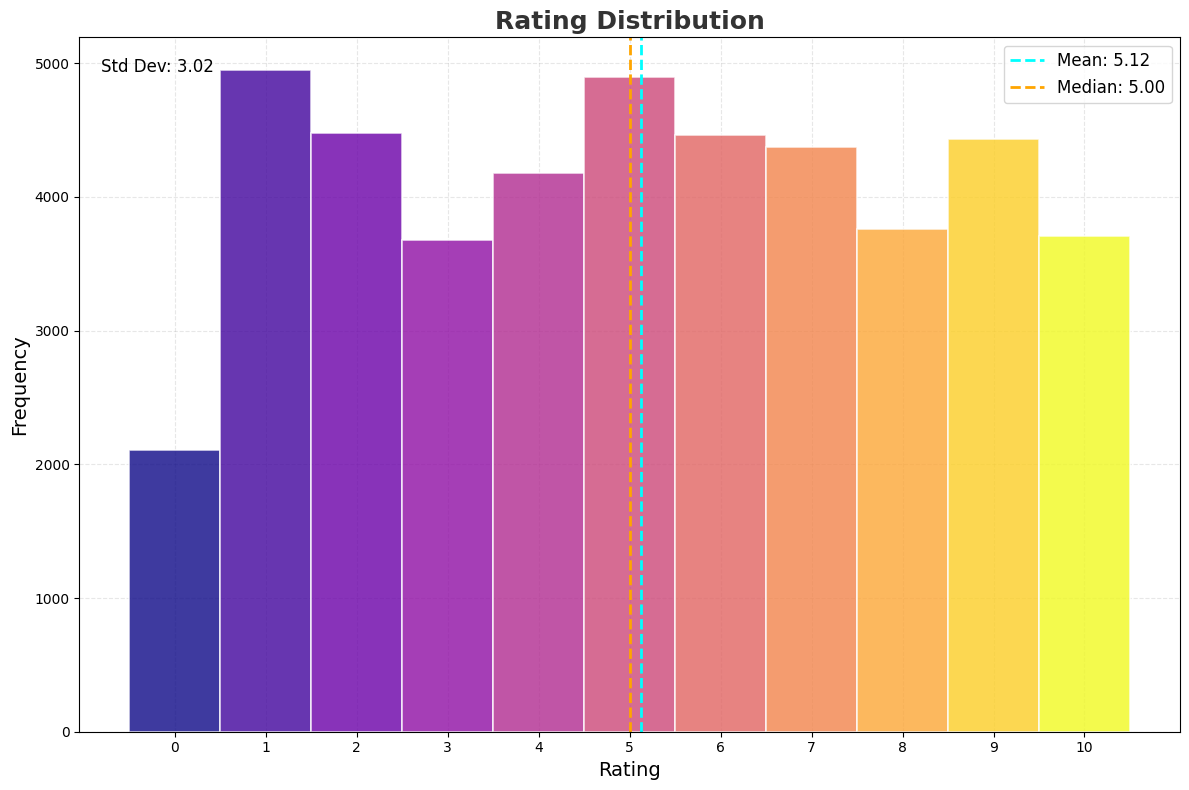

In [19]:

# Slide 22: Histogram (For 'rating')
plt.figure(figsize=(12, 8))
# Calculate statistics
mean_val = df['rating'].mean()
median_val = df['rating'].median()
std_val = df['rating'].std()

# Create histogram with gradient colors
n, bins, patches = plt.hist(df['rating'], bins=11, alpha=0.8, edgecolor='white', linewidth=1.2, 
                           range=(-0.5, 10.5))  # Range ensures proper bin alignment for ratings 0-10

# Create color gradient (purple to orange)
cm = plt.cm.get_cmap('plasma')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col = col / max(col)

# Apply gradient to histogram bars
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
# Add grid and style
plt.grid(True, alpha=0.3, linestyle='--')
plt.gca().set_axisbelow(True)

# Add title and labels
plt.title('Rating Distribution', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add statistical lines and annotations
plt.axvline(x=mean_val, color='#00FFFF', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(x=median_val, color='#FFA500', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
plt.text(0.02, 0.95, f'Std Dev: {std_val:.2f}', transform=plt.gca().transAxes, fontsize=12)

# Set x-ticks to show integer ratings only
plt.xticks(range(0, 11))

# Add legend and layout
plt.legend(frameon=True, fontsize=12)
plt.tight_layout()
plt.show()
# Visualizes 'rating' distribution with advanced gradient styling


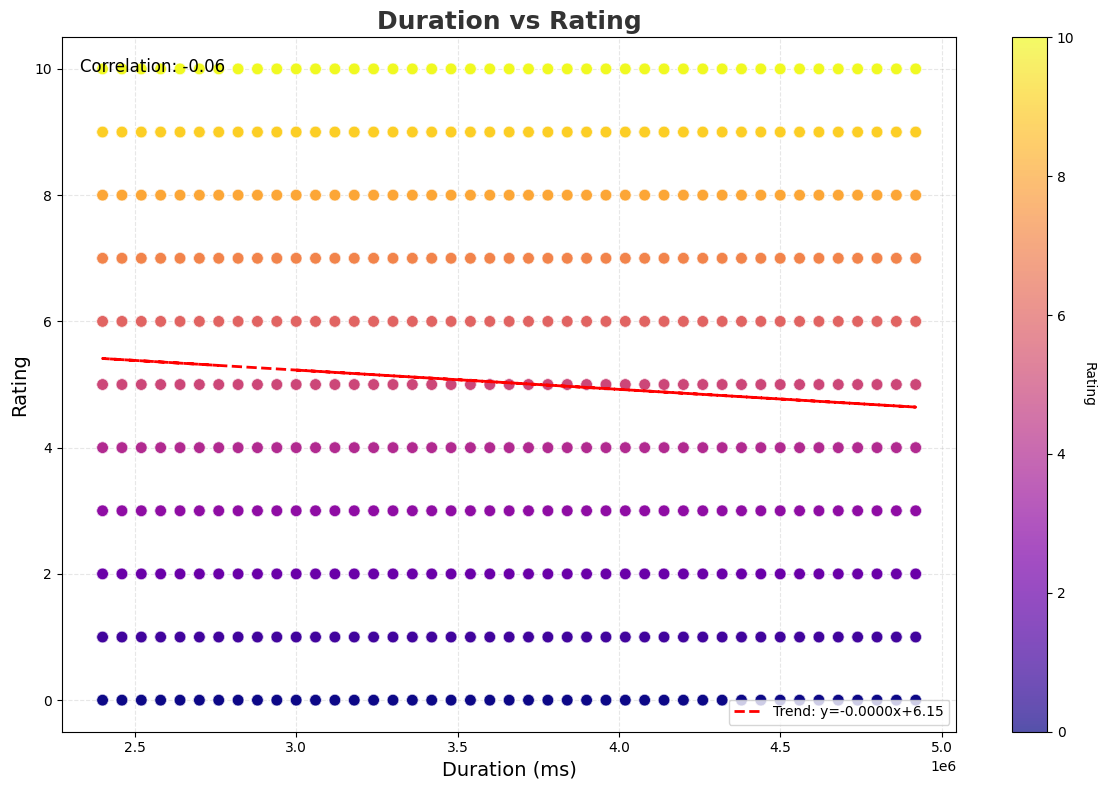

In [20]:

# Slide 23: Scatter Plot
plt.figure(figsize=(12, 8))

# Create colormap for points based on rating
scatter = plt.scatter(df['duration'], df['rating'], 
                     c=df['rating'], cmap='plasma', 
                     alpha=0.7, s=70, edgecolor='white', linewidth=0.5)

# Add statistical elements - linear regression line
z = np.polyfit(df['duration'], df['rating'], 1)
p = np.poly1d(z)
plt.plot(df['duration'], p(df['duration']), "r--", linewidth=2, label=f"Trend: y={z[0]:.4f}x+{z[1]:.2f}")

# Calculate correlation
corr = df['duration'].corr(df['rating'])

# Add grid and style
plt.grid(True, alpha=0.3, linestyle='--')
plt.gca().set_axisbelow(True)

# Add title and labels
plt.title('Duration vs Rating', fontsize=18, fontweight='bold', color='#333333')
plt.xlabel('Duration (ms)', fontsize=14)
plt.ylabel('Rating', fontsize=14)

# Add text annotation for correlation
plt.text(0.02, 0.95, f'Correlation: {corr:.2f}', transform=plt.gca().transAxes, fontsize=12)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Rating', rotation=270, labelpad=15)

# Add legend and layout
plt.legend(loc='lower right', frameon=True)
plt.tight_layout()
plt.show()
# Advanced scatter plot showing relationship between duration and rating

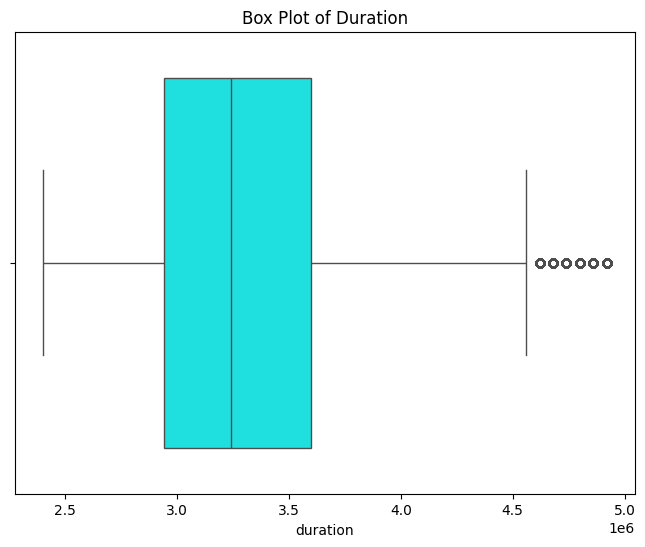

In [21]:
# Slide 24: Box Plot
#1 Box plot for 'duration'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['duration'], color='cyan')
plt.title('Box Plot of Duration')
plt.show()

# Creates box plot for 'duration'
# Visualizes quartiles and outliers

In [22]:
# Slide 25: Line Chart (Trends over 'release_date')
#1 Convert 'release_date' to datetime and plot


#add our old line chart code here and with diagram
# Plots average rating trend over time
# Shows temporal patterns

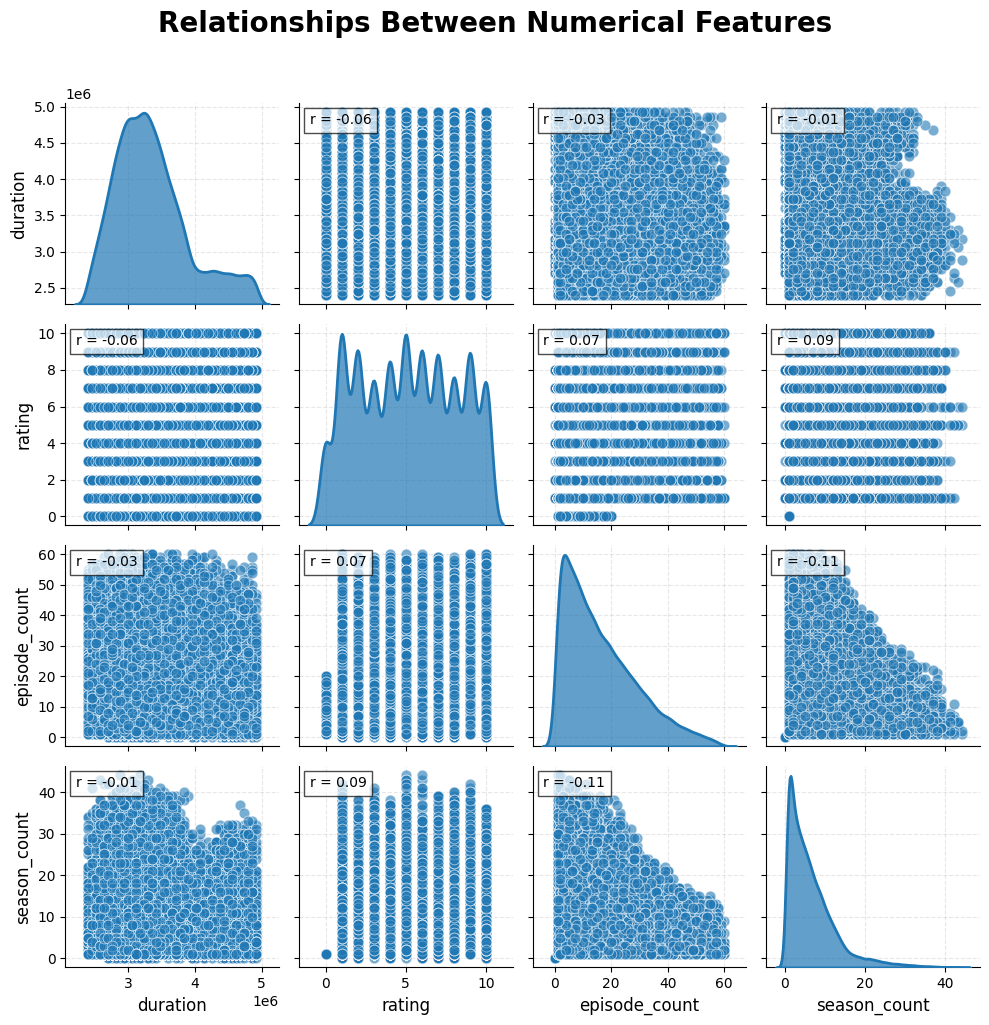

In [23]:

# Slide 26: Pair Plot
#1 Pair plot for numerical features
# Set up custom color palette
custom_palette = sns.color_palette("viridis", 4)

# Create enhanced pair plot
pair_plot = sns.pairplot(
    df[['duration', 'rating', 'episode_count', 'season_count']], 
    diag_kind='kde',  # Use KDE on diagonal
    plot_kws={'alpha': 0.6, 'edgecolor': 'white', 's': 60},  # Scatter plot styling
    diag_kws={'fill': True, 'alpha': 0.7, 'linewidth': 2},  # KDE styling
    corner=False,  # Show full matrix
    palette=custom_palette
)

# Add title
pair_plot.fig.suptitle('Relationships Between Numerical Features', fontsize=20, fontweight='bold', y=1.02)

# Enhance subplot aesthetics
for ax in pair_plot.axes.flatten():
    ax.grid(alpha=0.3, linestyle='--')
    ax.set_axisbelow(True)
    
    # Make labels more readable
    ax.xaxis.label.set_fontsize(12)
    ax.yaxis.label.set_fontsize(12)
    
    # Add correlation coefficients to non-diagonal plots
    if ax.get_xlabel() != ax.get_ylabel() and ax.get_xlabel() and ax.get_ylabel():
        x_var = ax.get_xlabel()
        y_var = ax.get_ylabel()
        corr = df[x_var].corr(df[y_var])
        ax.text(0.05, 0.95, f'r = {corr:.2f}', transform=ax.transAxes, 
                fontsize=10, va='top', bbox=dict(facecolor='white', alpha=0.7))

# Adjust spacing
pair_plot.fig.tight_layout()
plt.show()
# Plots pairwise relationships between numerical features with enhanced styling
# Explores correlations visually with correlation coefficients

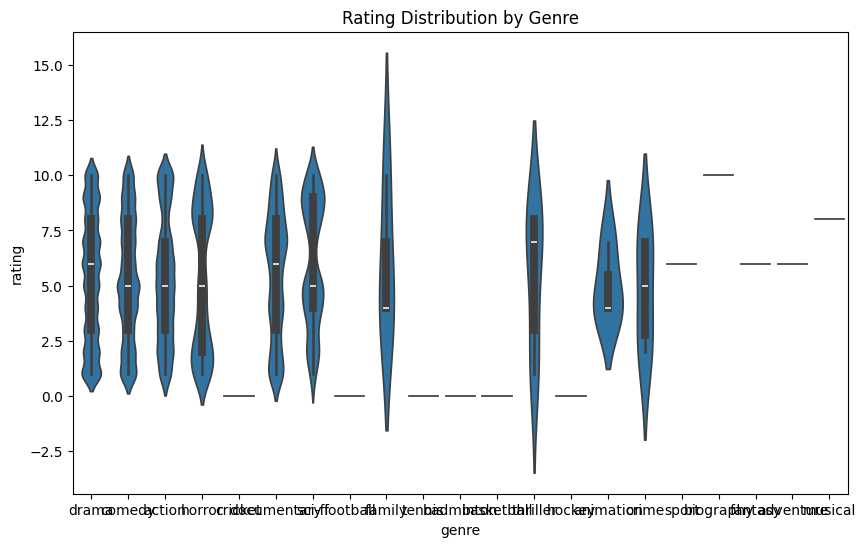

In [24]:
# Slide 27: Violin Chart
#1 Violin plot for 'rating' by 'genre'
plt.figure(figsize=(10, 6))
sns.violinplot(x='genre', y='rating', data=df)
plt.title('Rating Distribution by Genre')
plt.show()

# Creates violin plot to compare rating distributions
# Shows spread and density by genre

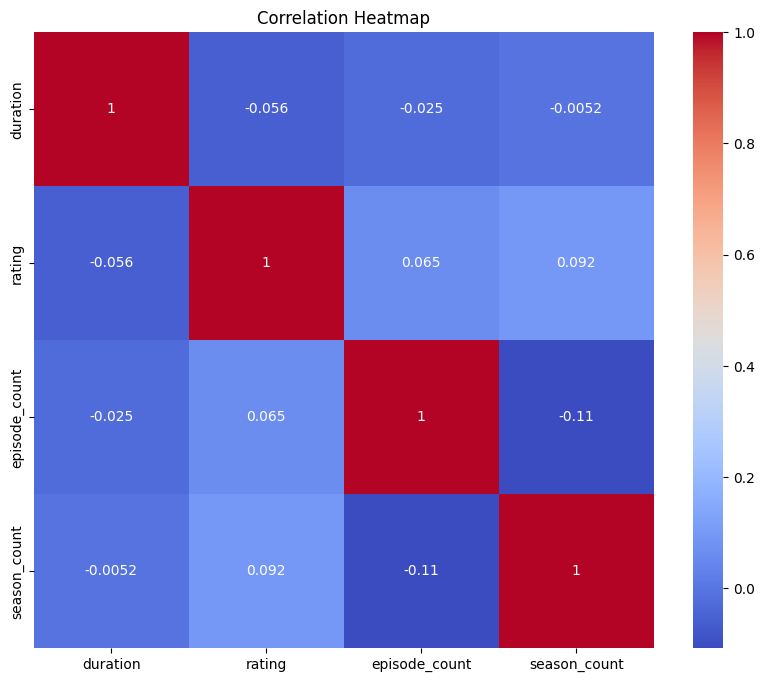

In [25]:
# Slide 28: Heatmap
#1 Correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[['duration', 'rating', 'episode_count', 'season_count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Displays correlation between numerical features
# Ide

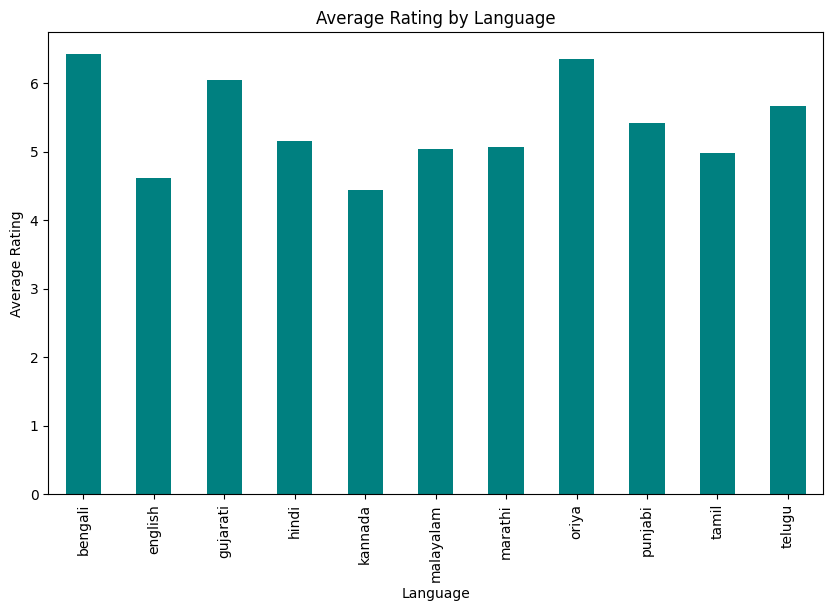

In [26]:
# Slide 29: Advanced Visualization (Bar Plot of Average Rating by Language)
#1 Bar plot for average rating by language
plt.figure(figsize=(10, 6))
df.groupby('language')['rating'].mean().plot(kind='bar', color='teal')
plt.title('Average Rating by Language')
plt.xlabel('Language')
plt.ylabel('Average Rating')
plt.show()

# Plots average rating per language
# Provides additional insight

In [27]:
# Slide 30: Selecting Suitable Algorithms
#1 Choose Linear Regression (simple) and SVD (advanced)
print("Selected Algorithms: Linear Regression (Simple), SVD (Advanced for Recommendations)")

# Declares chosen algorithms
# Sets modeling stage

Selected Algorithms: Linear Regression (Simple), SVD (Advanced for Recommendations)


In [28]:
# Slide 31: Implementing a Basic Model (Linear Regression)
#1 Prepare data and train Linear Regression
le_content = LabelEncoder()
le_language = LabelEncoder()
le_genre = LabelEncoder()
df['content_type'] = le_content.fit_transform(df['content_type'])
df['language'] = le_language.fit_transform(df['language'])
df['genre'] = le_genre.fit_transform(df['genre'])
X = df[['content_type', 'language', 'genre', 'duration', 'episode_count', 'season_count']]
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Encodes categorical variables and trains Linear Regression
# Predicts 'rating'

LinearRegression()

In [29]:
# Slide 32: Selecting Important Features
#1 Use all available features
print("Selected Features:", X.columns.tolist())

# Lists features used for prediction
# Confirms selection

Selected Features: ['content_type', 'language', 'genre', 'duration', 'episode_count', 'season_count']


In [30]:
# Slide 33: Encoding Categorical Variables (Done in Slide 31)
#1 Display encoded data
print("First 5 Rows After Encoding:")
print(df.head())

# Shows dataset after encoding
# Verifies conversion

First 5 Rows After Encoding:
        content_id  content_type  language  genre  duration release_date  \
1  cont_2185_15_21             1         1     10   3000000   2016-03-29   
2  cont_4857_13_28             1         9      6   3120000   2006-03-06   
4  cont_1664_10_29             1         3      0   3660000   2020-05-25   
5     cont_51_1_37             1         3      6   3060000   2002-02-04   
6   cont_2208_1_24             1         6     10   3600000   2011-07-09   

   rating  episode_count  season_count  
1       4             21            15  
2       8             28            13  
4       2             29            10  
5      10             37             1  
6       7             24             1  


In [31]:
# Slide 34: Train-Test Split (Done in Slide 31)
#1 Confirm split sizes
print("Train Shape:", X_train.shape, "Test Shape:", X_test.shape)

# Displays training and testing sizes
# Confirms split

Train Shape: (36031, 6) Test Shape: (9008, 6)


In [32]:
# Slide 35: Training the Model (Linear Regression)
#1 Display coefficients
print("Linear Regression Coefficients:", lr_model.coef_)

# Shows model coefficients
# Indicates feature importance

Linear Regression Coefficients: [-5.18848761e+00  3.94211169e-03  1.31847320e-02  3.66704104e-08
 -1.33602356e-04  1.03927299e-02]


In [33]:
# Slide 36: Making Predictions
#1 Predict on test data
y_pred_lr = lr_model.predict(X_test)

# Generates predictions using Linear Regression
# Outputs predicted ratings

In [34]:
# Slide 37: Evaluating Accuracy
#1 Calculate RMSE and R2 score
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression RMSE:", rmse_lr, "R2 Score:", r2_lr)

# Computes RMSE and R2 for evaluation
# Measures error and fit

Linear Regression RMSE: 2.7937536106615695 R2 Score: 0.13536440799811156


In [35]:
# Slide 38: Precision, Recall, and F1-Score (Not Applicable for Regression)
#1 Note that these metrics are for classification
print("Note: Precision, Recall, and F1-Score are not applicable for Linear Regression (regression task).")

# Clarifies inapplicability
# Keeps slide consistent

Note: Precision, Recall, and F1-Score are not applicable for Linear Regression (regression task).


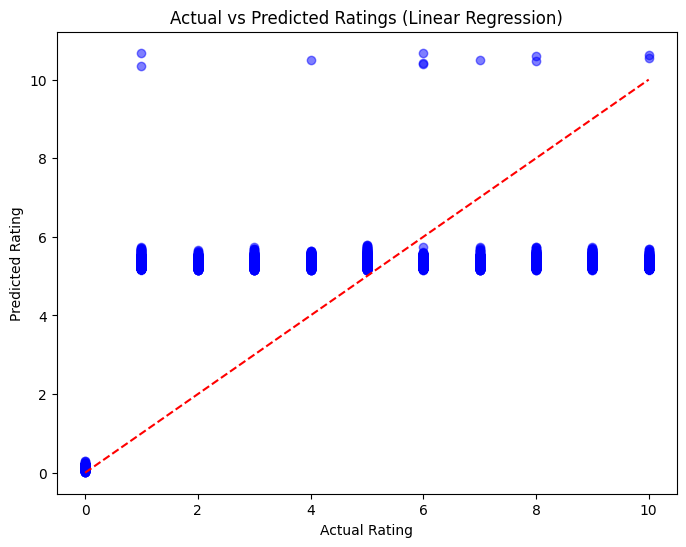

In [36]:
# Slide 39: Performance Metrics Visualization
#1 Plot actual vs predicted ratings
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Ratings (Linear Regression)')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.show()

# Visualizes actual vs predicted ratings
# Shows model fit

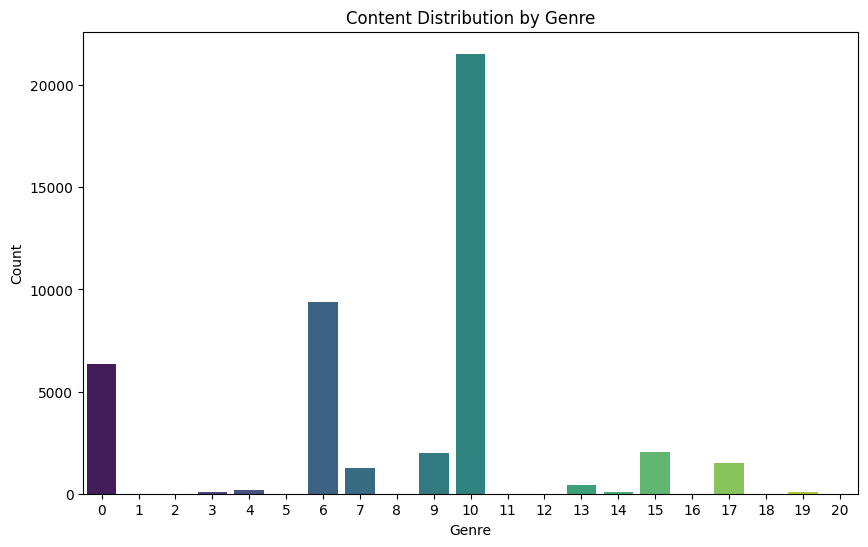

In [37]:
# Slide 40: Counter Plot Analysis
#1 Count plot for 'genre'
plt.figure(figsize=(10, 6))
sns.countplot(x='genre', data=df, palette='viridis')
plt.title('Content Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

# Plots count of content by genre
# Shows category-wise distribution

In [38]:
# Slide 41: Grouping Data
#1 Group by 'language' and 'genre' to analyze average rating
grouped_data = df.groupby(['language', 'genre'])['rating'].mean().reset_index()
print("Grouped Data (Average Rating by Language and Genre):")
print(grouped_data)

# Groups data and computes average rating
# Provides aggregated insights

Grouped Data (Average Rating by Language and Genre):
    language  genre    rating
0          0      0  8.890625
1          0      6  5.515873
2          0     10  5.806283
3          0     15  7.578125
4          1      0  5.144860
..       ...    ...       ...
82        10     10  5.467320
83        10     11  4.000000
84        10     15  5.710714
85        10     17  6.224026
86        10     18  6.000000

[87 rows x 3 columns]


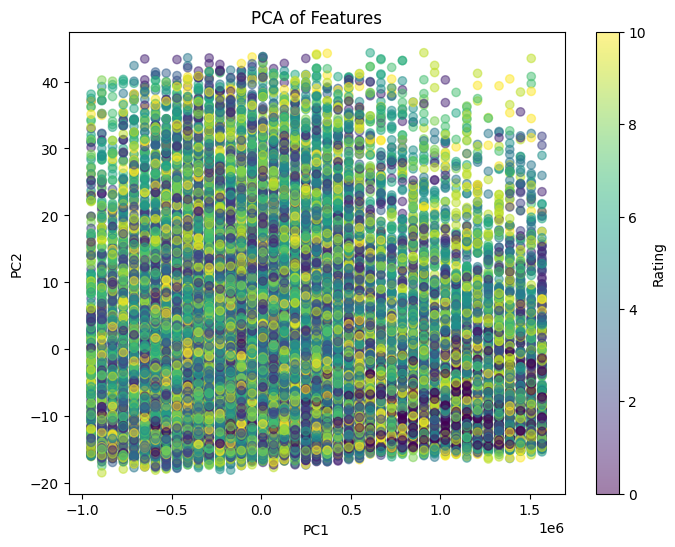

Explained Variance Ratio: [9.99999999e-01 5.35489882e-10]


In [39]:
# Slide 42: PCA (Principal Component Analysis)
#1 Apply PCA to reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('PCA of Features')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Rating')
plt.show()
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Reduces features to 2D and visualizes
# Shows variance explained by components

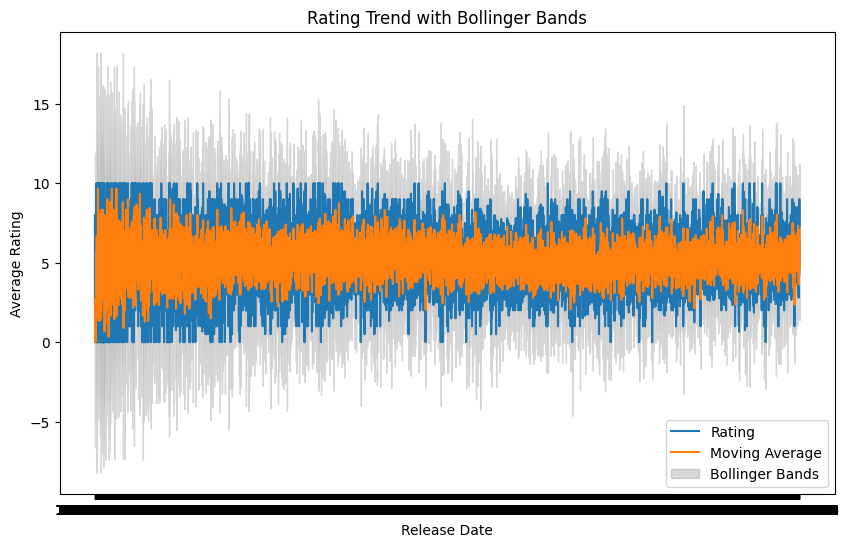

In [40]:

# Reduces features to 2D and visualizes
# Shows variance explained by components

# Slide 43: Bollinger Bands (Adapted for 'rating' over time)
#1 Simulate Bollinger Bands for average rating trend
rating_trend = df.groupby('release_date')['rating'].mean().reset_index()
rating_trend['MA'] = rating_trend['rating'].rolling(window=3).mean()
rating_trend['STD'] = rating_trend['rating'].rolling(window=3).std()
rating_trend['Upper'] = rating_trend['MA'] + (rating_trend['STD'] * 2)
rating_trend['Lower'] = rating_trend['MA'] - (rating_trend['STD'] * 2)
plt.figure(figsize=(10, 6))
plt.plot(rating_trend['release_date'], rating_trend['rating'], label='Rating')
plt.plot(rating_trend['release_date'], rating_trend['MA'], label='Moving Average')
plt.fill_between(rating_trend['release_date'], rating_trend['Lower'], rating_trend['Upper'], color='gray', alpha=0.3, label='Bollinger Bands')
plt.title('Rating Trend with Bollinger Bands')
plt.xlabel('Release Date')
plt.ylabel('Average Rating')
plt.legend()
plt.show()

# Adapts Bollinger Bands for rating trend
# Shows volatility over time


In [41]:
# Slide 44: Confusion Matrix (Not Applicable for Regression)
#1 Note that this is for classification
print("Note: Confusion Matrix is not applicable for Linear Regression (regression task).")

# Clarifies inapplicability
# Maintains slide consistency

Note: Confusion Matrix is not applicable for Linear Regression (regression task).


In [42]:
# Slide 45: Implementing Advanced Algorithms (SVD for Recommendations)
#1 Simulate user-item matrix and apply SVD
user_item_matrix = pd.pivot_table(df, values='rating', index='content_id', columns='genre', fill_value=0)
svd = TruncatedSVD(n_components=2, random_state=42)
matrix_svd = svd.fit_transform(user_item_matrix)
print("SVD Matrix Shape:", matrix_svd.shape)

# Creates pivot table and applies SVD
# Reduces dimensions for recommendation

SVD Matrix Shape: (45039, 2)


In [43]:
# Slide 46: Comparing Advanced & Basic Models
#1 Compare Linear Regression and SVD
print("Linear Regression RMSE:", rmse_lr, "SVD not directly comparable (used for recommendations)")

# Notes different purposes of models
# Highlights evaluation differences

Linear Regression RMSE: 2.7937536106615695 SVD not directly comparable (used for recommendations)


In [44]:

# Slide 47: Building the Recommendation System (SVD-Based)
#1 Define recommendation function using SVD
def recommend_svd_content(content_id, user_item_matrix, svd_matrix, top_n=3):
    if content_id not in user_item_matrix.index:
        print(f"Content ID {content_id} not found in the dataset.")
        return []
    
    content_idx = user_item_matrix.index.get_loc(content_id)
    content_vector = svd_matrix[content_idx]
    
    # Calculate similarity using dot product
    similarities = np.dot(svd_matrix, content_vector) / \
                  (np.linalg.norm(svd_matrix, axis=1) * np.linalg.norm(content_vector) + 1e-10)  # Add small value to avoid division by zero
    
    # Get top N similar items (excluding the item itself)
    similar_indices = similarities.argsort()[-top_n-1:-1][::-1]
    
    # Return content IDs
    similar_content_ids = [user_item_matrix.index[idx] for idx in similar_indices]
    return similar_content_ids

# Uses SVD latent factors for recommendations
# Recommends top N similar content


In [45]:
# Slide 48: Sample Data for Testing Recommendations
#1 Test with sample content
# Use a content ID that exists in the dataset
sample_content = df['content_id'].iloc[0]  # Get the first content ID in the dataset
print(f"Sample Content for Testing: {sample_content}")

# Selects sample content ID
# Prepares for testing


Sample Content for Testing: cont_2185_15_21


In [46]:
# Slide 49: Display Recommendation Output
#1 Test SVD recommendations
if len(user_item_matrix) >= 2:  # Check if we have enough data for recommendations
    recommendations_svd = recommend_svd_content(sample_content, user_item_matrix, matrix_svd)
    print(f"SVD Recommendations for {sample_content}:")
    
    # Store original genre and language names before encoding
    original_genres = df['genre'].copy()
    original_languages = df['language'].copy()
    
    # Get details about the sample content
    sample_content_info = df[df['content_id'] == sample_content].iloc[0]
    sample_idx = df[df['content_id'] == sample_content].index[0]
    
    print(f"Original Content: {sample_content}")
    print(f"Genre: {original_genres[sample_idx]}, Language: {original_languages[sample_idx]}, Rating: {sample_content_info['rating']}")
    
    print("\nRecommended Content:")
    for i, content_id in enumerate(recommendations_svd, 1):
        if content_id in df['content_id'].values:
            content_info = df[df['content_id'] == content_id].iloc[0]
            content_idx = df[df['content_id'] == content_id].index[0]
            
            print(f"{i}. {content_id}")
            print(f"   Genre: {original_genres[content_idx]}, Language: {original_languages[content_idx]}, Rating: {content_info['rating']}")
else:
    print("Not enough unique content items for meaningful recommendations.")

# Tests SVD-based recommendations
# Displays similar content IDs with details using original category names

SVD Recommendations for cont_2185_15_21:
Original Content: cont_2185_15_21
Genre: 10, Language: 1, Rating: 4

Recommended Content:
1. cont_416_6_14
   Genre: 10, Language: 1, Rating: 10
2. cont_416_6_13
   Genre: 10, Language: 1, Rating: 10
3. cont_416_9_16
   Genre: 10, Language: 1, Rating: 10
